<a href="https://colab.research.google.com/github/cit08/Phyton_2/blob/main/Copia_de_practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3
* Puede resolver aquí los ejercicios abriendo una celda después de cada uno de los enunciados.  
* Por favor, documente la solución de los ejercicios añadiendo suficientes **comentarios** del programador que expliquen el código.

## Ejercicio 3.1. Trabajar con un DataSet
* Obtener un dataset, preferiblemente con datos financieros, actuariales, económicos o estadísticos.
* Crear un modelo de análisis de los datos, utilizando las librerías principales para el análisis de datos, por ejemplo:
    - NumPy
    - Pandas
    - Matplotlib

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

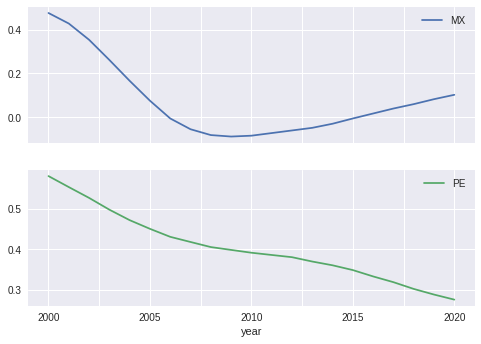

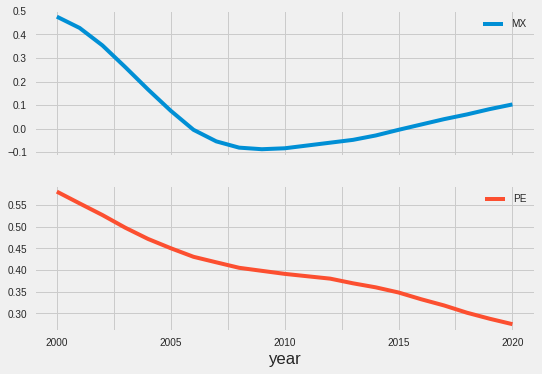

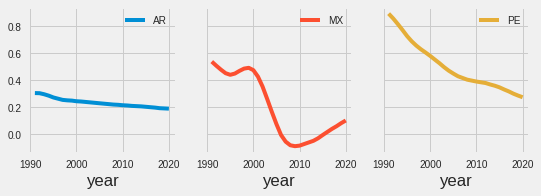

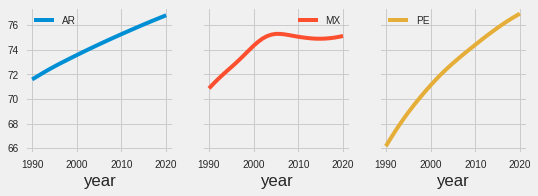

In [ ]:
#Se obtiene un dataset de la Esperanza de Vida de los países de México, Perú y Argentina del Banco Mundial de 1990 - 2020, 
#se genera un indicador de mejora de la Esperanza de Vida y se gráfica y por último se muestran las gráficas del indicador y de la
#Esperanza de vida de los 3 países

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import wb
import matplotlib.pyplot as plt

pd.set_option('display.precision',2)
%matplotlib inline

#Se definen las caracteristicas de busqueda 
wb.search('life.*expectancy.*birth')

#Se definen el grupo de países como lista
paises=['MX','PE','AR']
paises2={'Mexico':'MX','Peru':'PE','Argentina':'AR'}

datos = wb.download(indicator = 'SP.DYN.LE00.IN', country = paises, start=1990, end=2020)
life_exp=datos.unstack('country')['SP.DYN.LE00.IN']
life_exp.rename(columns=paises2, inplace = True)
life_exp
#life_exp.index = pd.period_range(start=life_exp.index[0], periods=len(life_exp.index))
mejora_life =100*life_exp.pct_change()
mejora_life.tail()

#Se definen las caracteristicas del gráfico seaborn y se guarda estas gráficas en un archivo pdf
plt.style.use('seaborn');
mejora_life.columuns = paises
mejora_life[['MX','PE']]['2000':].plot(subplots= True)
plt.savefig('mejora_life.pdf', bbox_inches ='tight')

#Se definen las caracteristicas del gráfico fivethirtyeigt
plt.style.use('fivethirtyeight');
mejora_life.columuns = paises
mejora_life[['MX','PE']]['2000':].plot(subplots= True)
#plt.savefig('mejora_life.pdf', bbox_inches ='tight')

mejora_life.plot(subplots= True, layout =[2,3], sharey=True);
plt.style.available

life_exp.plot(subplots= True, layout =[2,3], sharey=True);
plt.style.available

## Ejercicio 3.2. Gráfico histórico de un índice o valor bursátil
* Descargar un archivo con formato ***csv*** de la página de Yahoo Finanzas con la cotización de:
 - un índice (IBEX, NASDAQ, ...) o
 - valor bursátil,
* o bien, de otra fuente disponible.
* Crear un procedimiento que lea el fichero y finalmente obtenga un gráfico del histórico del índice o valor.
* Tomar el periodo histórico más largo posible.
* Alternativamente o adicionalmente, si disponemos de una API o fuente de información diferente de un *csv* descargado de forma manual, también se podría realizar de una forma más automatizada.

In [ ]:
!pip3 install plotly
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import pandas_datareader as pdr
import matplotlib
print(pdr.__version__)

0.9.0


In [ ]:
#se crea una archivo de excel de 4 acciones en el cual se listan el precio de apertura, de precio más alto
# el precio má bajo, el precio de cierre de ajuste de cierre y el volumen (una hoja por cada acción)

import time
import datetime
import pandas as pd


tickers = ['TWTR', 'MSFT', 'GOOG', 'AAPL']
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2005, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 6, 30, 23, 59).timetuple()))

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in tickers:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.to_excel(xlwriter, sheet_name=ticker, index=False)

xlwriter.save()

[*********************100%***********************]  1 of 1 completed


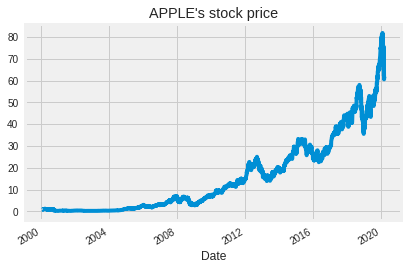

In [ ]:
#Se descarga un archivo csv del precio de stock de Apple de febrero 2000 a marzo de 2022 y se gráfica
#se crea un for para listar los datos pero se pone como comentarios por el espacio que ocupa

import csv
data_df = yf.download("AAPL", start="2000-02-01", end="2020-03-20")
data_df.to_csv('aapl.csv')

lista=[]
with open('/content/aapl.csv') as data: #se abre el archivo csv
  entrada = csv.reader(data, delimiter=',')
  lista = list(entrada) # se crea una lista

#For sirve para listar los datos
#for linea in lista:
#  print(linea) 

data_df['Close'].plot(title="APPLE's stock price")



[*********************100%***********************]  1 of 1 completed


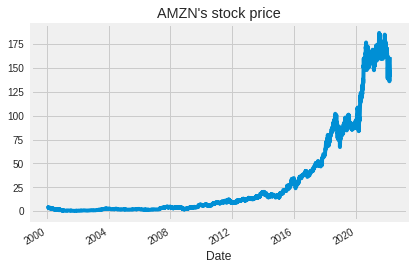

In [ ]:
#Se descarga un archivo csv del precio de stock de Amazon de febrero 2000 a marzo de 2022 y se gráfica

import pandas
data_df = yf.download("AMZN", start="2000-02-01", end="2022-03-20")
data_df.to_csv('amzn.csv')

data = pandas.read_csv('/content/amzn.csv')
#print(data)
data.tail()

data_df['Close'].plot(title="AMZN's stock price")

## Ejercicio 3.3. Trabajar con la Librería openpyxl
* Crear una aplicación programada en Python que permita interactuar con la **hoja de cálculo** tanto para lectura, como para escritura.
* Utilice la Librería openpyxl, u otra que considere adecuada para interactuar con hoja de cálculo

## Ejercicio 3.4. Librería actuarial
* Utilizando la librería actuarial **pyliferisk**, o cualquier otra que considere adecuada en este campo, cree un caso donde se muestren diferentes cálculos y procedimientos que se puedan realizar con ella.
* Alternativamente, puede realizar su propia librería actuarial y probarla creando ejemplos prácticos. En este caso, no olvide documentar la funcionalidad de los métodos que programe, utilizando POO.

In [ ]:
!pip3 install lifelib
!pip3 install notebook 
!pip3 install imageio 
!pip3 install matplotlib

In [75]:
#Basiclife sirve para construir modelos de proyección de seguros de vida. 
#Los modelos en esta biblioteca proyectan conjuntos mínimos de flujos de efectivo 
#de pólizas de vida simples genéricas hipotéticas y no se asumen regulaciones específicas. 

import lifelib
#se crea la carpeta de mylife donde se encuentran todos los programas de la libreria
lifelib.create("basiclife", "mylife")

FileExistsError: ignored

In [76]:
#se lee el archivo de excel que viene en la libreria 
df = pd.read_excel(r"/content/mylife/BasicTerm_ME/model_point_table.xlsx", index_col=0)
df



,age_at_entry,sex,policy_term,policy_count,sum_assured,duration_mth
policy_id,,,,,,
1,47,M,10,86,622000,1
2,29,M,20,56,752000,210
3,51,F,10,83,799000,15
4,32,F,20,72,422000,125
5,28,M,15,99,605000,55
...,...,...,...,...,...,...
9996,47,M,20,25,827000,157
9997,30,M,15,81,826000,168
9998,45,F,20,10,783000,146


In [130]:
#Genera un modelo de puntos de los modelos de BasicTerm_S o
#BasicTerm_M ajustando parámetros de acuerdo a la necesidades

import numpy as np
from numpy.random import default_rng  
rng = default_rng(12345)

# Numero del Modelo de Puntos
MPCount = 1000

# Intervalo de Edad(Integer): 25 - 59 
age_at_entry = rng.integers(low=25, high=66, size=MPCount)

# Sexo (Char)
Sex = [
    "M",
    "F"
]
sex = np.fromiter(map(lambda i: Sex[i], rng.integers(low=0, high=len(Sex), size=MPCount)), np.dtype('<U1'))

# Témino de la Poliza (Integer): 10, 15, 20
policy_term = rng.integers(low=0, high=3, size=MPCount) * 5 + 10

# Recuento de polizas (Integer): 1
policy_count = [1] * MPCount

# Suma aseguradad(Float): 10000 - 25000
sum_assured = np.round((25000 - 10000) * rng.random(size=MPCount) + 1000, -3)

In [131]:
#se genera un archivo de excel 
import pandas as pd
attrs = [
    "age_at_entry",
    "sex",
    "policy_term",
    "policy_count",
    "sum_assured"
]
data = [
    age_at_entry,
    sex,
    policy_term,
    policy_count,
    sum_assured
]
model_point_table = pd.DataFrame(dict(zip(attrs, data)), index=range(1, MPCount+1))
model_point_table.index.name = "policy_id"
model_point_table
model_point_table.to_excel("model_point_table1.xlsx")

In [ ]:
import itertools
import modelx as mx
import pandas as pd

In [143]:
#con el modelo de puntos se genera una tabla con ciertas carcaterística de edad de entrada y terminos de la poliza
df = pd.DataFrame(itertools.product(range(25, 65), [15, 20, 25]), columns=['age_at_entry', 'policy_term'])
df.index += 1
df.index.name = 'point_id'
df["sum_assured"] = 1
df
space.model_point_table = df
df

,age_at_entry,policy_term,sum_assured
point_id,,,
1,25,15,1
2,25,20,1
3,25,25,1
4,26,15,1
5,26,20,1
...,...,...,...
116,63,20,1
117,63,25,1
118,64,15,1


In [144]:
#Se generan las primas de la muestra generada del modelo de puntos
premium_rate()

array([6.11755527e-05, 6.86945406e-05, 7.72281788e-05, 6.34472793e-05,
       7.14991376e-05, 8.06854656e-05, 6.58928613e-05, 7.45226753e-05,
       8.44200822e-05, 6.85263505e-05, 7.77837009e-05, 8.84566414e-05,
       7.13631858e-05, 8.13026444e-05, 9.28223295e-05, 7.44203428e-05,
       8.51020274e-05, 9.75472009e-05, 7.77165017e-05, 8.92066979e-05,
       1.02664509e-04, 8.12722349e-05, 9.36440944e-05, 1.08211077e-04,
       8.51102174e-05, 9.84445414e-05, 1.14227718e-04, 8.92554627e-05,
       1.03641583e-04, 1.20759706e-04, 9.37355878e-05, 1.09272355e-04,
       1.27857305e-04, 9.85811110e-05, 1.15378012e-04, 1.35576373e-04,
       1.03825787e-04, 1.22004196e-04, 1.43979027e-04, 1.09506983e-04,
       1.29201578e-04, 1.53134416e-04, 1.15666105e-04, 1.37026460e-04,
       1.63119571e-04, 1.22349075e-04, 1.45541457e-04, 1.74020381e-04,
       1.29606875e-04, 1.54816273e-04, 1.85932683e-04, 1.37496152e-04,
       1.64928569e-04, 1.98963503e-04, 1.46079913e-04, 1.75964954e-04,
      

In [145]:
# Se benera la Tabla con la prima generadoda y los datos generados en el modelo de putnso
premium_rate_table = df.copy()
premium_rate_table["premium_rate"] = space.premium_rate()
del premium_rate_table["sum_assured"]
premium_rate_table.set_index(["age_at_entry", "policy_term"], inplace=True)
premium_rate_table["premium_rate"]   # As Series

age_at_entry  policy_term
25            15             6.12e-05
              20             6.87e-05
              25             7.72e-05
26            15             6.34e-05
              20             7.15e-05
                               ...   
63            20             8.80e-04
              25             1.16e-03
64            15             7.36e-04
              20             9.68e-04
              25             1.28e-03
Name: premium_rate, Length: 120, dtype: float64

## Ejercicio 3.5. Trabajar con una API
* Localizar una API con datos que puedan resultar de interés.
* Crear una aplicación programada en Python que utilice los datos de la API, preferiblemente con datos en tiempo real.
* Mostrar la información que nuestra aplicación pueda procesar, según ciertos filtros, que faciliten el uso de la API.

## Ejercicio 3.6. Página web con Flask
* Crear una aplicación de página web programada en Python con el framework Flask.
* Puede desplegarla en alguna plataforma gratuita como, por ejemplo, [Pythonanywhere](https://www.pythonanywhere.com) o [Heroku](https://www.heroku.com).

## Ejercicio 3.7. Bot de Telegram que proporciona cotizaciones en tiempo real
Crear un Bot de Telegram programado en Python que realizando **Web Scraping** nos pueda dar precios en tiempo real de valores cotizados en bolsa, o en mercados financieros internacionales.  
Adjuntar capturas de pantalla mostrando el funcionamiento del bot en Telegram.

## Ejercicio 3.8. Estrategias de Trading
* Elegir una compañía cotizada y realizar con ella diferentes estrategias de trading, con gráficos e indicadores bursátiles.
* Puede utilizar la librería TA-Lib u otro sistema para efectuar el análisis.

## Ejercicio 3.9. Finanzas
Estudie casos en el campo de las finanzas:
* VAN y TIR
* Cuadro de amortización de préstamos
* Operativa con activos de Renta Fija: bonos
* *Duration*
* Estructura Temporal de los Tipos de Interés (ETTI)
* Forwards sobre tipos de interés
* Arbitraje
* Random Walk en una y dos dimensiones
* ... / ...


## Ejercicio 3.10. Valoración de opciones financieras
* Método de valoración de opciones europeas mediante arbol binomial
* Método de Black-Scholes
* Convergencia de ambos métodos
* Gráfico de convergencia
* Arbitraje en caso de no cumplirse la paridad Put-Call